In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

np.random.seed(1)
plt.style.use('seaborn')

In [12]:
# set params
N, n_feature = 100, 3
lr = 0.01 
t_W = np.random.uniform(-3, 3, (n_feature, 1))
t_b = np.random.uniform(-3, 3, (1, ))

W = np.random.uniform(-3, 3, (n_feature, 1))
b = np.random.uniform(-3, 3, (1, 1))

In [13]:
# generate dataset 
x_data = np.random.randn(N, n_feature)
y_data = np.matmul(x_data, t_W) + t_b 

# print(x_data.shape, y_data.shape)

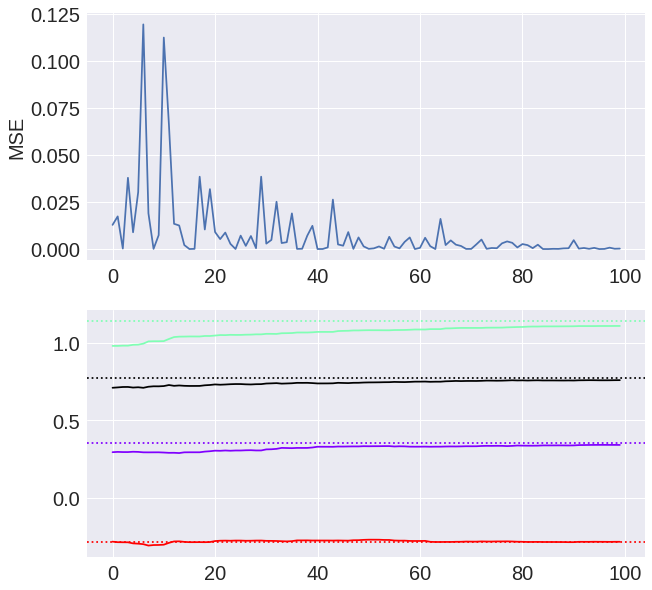

In [16]:
J_track = list()
W_track, b_track = list(), list()

for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
    W_track.append(W)
    b_track.append(b)

    # forward propagation
    X = X.reshape(1, -1)
    pred = X @ W + b
    J = (y - pred) ** 2
    J_track.append(J.squeeze())

    # jacobians
    dJ_dpred = -2 * (y - pred)
    dpred_dW = X
    dpred_db = 1

    # back propagation
    dJ_dW = dJ_dpred * dpred_dW
    dJ_db = dJ_dpred * dpred_db

    # parameter update
    W = W - lr * dJ_dW.T
    b = b - lr * dJ_db

# print(W_track[0].shape)   
W_track = np.hstack(W_track)
b_track = np.concatenate(b_track).flatten()

# print(W_track.shape, b_track.shape)

# visualize results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize=20)
axes[0].tick_params(labelsize=20)

cmap = cm.get_cmap('rainbow', lut=n_feature)
for w_idx, (t_w, w) in enumerate(zip(t_W, W_track)):
    axes[1].axhline(y=t_w, color=cmap(w_idx), linestyle=':')
    axes[1].plot(w, color=cmap(w_idx))
axes[1].axhline(y=t_b, color='black', linestyle=':')
axes[1].plot(b_track, color='black')
axes[1].tick_params(labelsize=20)